# Homework 3

This homework will explore linear regression and resampling techniques by analyzing data from a database of glaciers. The database is *Glatilda* for [*Glacier Ice Thickness Database*](!https://www.gtn-g.ch/data_catalogue_glathida/).

1. Data prep (5 points)
2. Mapping (10 points)
3. Correlations between parameters (5 points)
4. Linear regression and resampling techniques (10 points)

## 1. Data Prep (5 points total)

### a) Download data (1 point) 
The database is saved on a GitLab repository that you may clone: https://gitlab.com/wgms/glathida.git



In [2]:
# answer
# In a terminal, I ran 
# git clone https://gitlab.com/wgms/glathida.git

### b) Import Python modules (1 point) 
Import pandas, geopandas, plotting, raster files,  numpy, netcdf

In [6]:
# solution
import numpy as np
import pandas as pd
import io
import geopandas
import matplotlib.pyplot as plt


### c) Read data (2 points)
Read the glacier data from the file ``glathida/data/glacier.csv`` into a pandas data frame, and decribe briefly the dataframe content and its first few lines.

In [12]:
# solution
t_path = "glathida/data/glacier.csv"
glacier_df = pd.read_csv(t_path)
display(glacier_df)

,id,survey_id,name,external_db,external_id,lat,lon,date,max_date,area,...,mean_thickness,mean_thickness_uncertainty,max_thickness,max_thickness_uncertainty,number_points,number_profiles,length_profiles,interpolation_method,flag,remarks
0,1,1,Isfallsglaciären,WGI,SE4B000E0006,67.91500,18.56800,1979-03-01,1979-03-31,1.300,...,72.0,NaN,220.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,Rabots glaciär,WGI,SE4B000E1016,67.91000,18.49600,1979-03-01,1979-03-31,4.100,...,84.0,NaN,175.0,NaN,NaN,10.0,NaN,NaN,NaN,NaN
2,3,1,Storglaciären,WGI,SE4B000E0005,67.90000,18.57000,1979-03-01,1979-03-31,3.100,...,99.0,NaN,250.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2,South Cascade Glacier,WGI,US2M00264006,48.35698,-121.05735,1975-01-01,1975-12-31,2.000,...,99.0,NaN,195.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,3,Athabasca Glacier,FOG,7,52.17540,-117.28400,NaN,NaN,3.800,...,150.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1008,6627,254,Mount Adams,NaN,NaN,46.20240,-121.49090,1935-01-01,1935-12-31,NaN,...,NaN,NaN,NaN,NaN,14.0,NaN,NaN,NaN,NaN,NaN
1009,6628,255,Mount Adams,NaN,NaN,46.20240,-121.49090,2002-05-01,2002-05-31,16.200,...,57.0,NaN,NaN,NaN,217.0,NaN,NaN,NaN,NaN,AREA: Sitts et al. 2010 (https://doi.org/10.39...
1010,6629,256,Mount Adams,NaN,NaN,46.20398,-121.49376,2006-07-01,2006-07-31,NaN,...,NaN,NaN,120.0,NaN,78.0,NaN,NaN,NaN,partial,NaN
1011,6630,128,Mullwitzkees,AGI,6054,47.08670,12.38000,1998-01-01,1998-12-31,3.229,...,39.0,9.0,78.0,13.0,30.0,NaN,NaN,anudem,NaN,LAT/LON: FoG 2015 | AREA: Austrian Glacier inv...


**Explore the data with visualization**
Before making any inference of models with the data, we will start by exploring basic correlations among parameters by plotting. In particular, we will focus on ``mean_thickness``, ``area``, ``mean_slope`` parameters.

### d) Remove bad data (1 point)

The database may contain Nans and other "bad" values (welcome to the data world!). First we will clean the data by removing nans. We are mostly interested in the thickness, area, and slope



In [19]:
#answer below 
glacier_df_trimmed = glacier_df[['name', 'lat', 'lon', 'mean_thickness', 'area', 'mean_slope']]
glacier_df_nonans = glacier_df_trimmed.dropna(axis=0)
display(glacier_df_nonans)

,name,lat,lon,mean_thickness,area,mean_slope
32,Easton Glacier,48.750000,-121.830000,58.0,2.900,0.0
33,Lemon Creek Glacier,58.380000,-134.360000,66.0,11.700,0.0
34,Praviy Aktru,50.061340,87.697410,56.0,5.150,0.0
35,Maliy Aktru,50.049670,87.745520,86.0,2.840,0.0
36,Leviy Aktru,50.080080,87.690250,90.0,5.950,0.0
...,...,...,...,...,...,...
619,Blekumbreen,78.245480,16.064380,32.0,2.100,13.0
627,Tuyuksu (central),43.043653,77.080587,47.0,2.610,20.0
631,Aldegondabreen,77.971400,14.069100,65.0,6.737,6.0
745,Ariebreen,77.027200,15.485400,27.0,0.370,19.0


## 2. Mapping glaciers (10 points)

Make a global map of the glaciers. Use either of the tools we learned in class:
* Geopandas, DEMs from NetCDFfiles (see chapter 2.4)
* Pandas and Plotly (see chapter 2.2). You may need to transform some of the series into log-spaced values for better visualization.

## Option 2: Plotly

You may use plotly. For improved visibility, transform some of the data into log-spaced. You may add these transformed Series into the Pandas, and use them as input to plotly.

In [21]:
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'iframe' # writes files as standalone html, 


In [27]:
# solution
fig = px.scatter_geo(glacier_df_nonans,
                     lat='lat',lon='lon', 
                     range_color=(glacier_df_nonans.mean_thickness.min(),glacier_df_nonans.mean_thickness.max()),
                     height=600, width=600,
                     color='mean_thickness',
                     hover_name="name",
                     hover_data=['name', 'mean_thickness', 'area', 'mean_slope']);
fig.update_geos(resolution=110, showcountries=True)
fig.update_geos(resolution=110, showcountries=True,projection_type="orthographic")


## 3. Correlations between data parameters ( 5 points total)

Make plots to vizualise the correlation, or lack of, between all three data. Make at least three plots.

### a) Basic correlations using Matplotlib (2 points)

Make 3 plots using matplotlib to visualize slope, mean_thickness, and area. Use logscale to see the correlatons.

__Tips__: 
* Use the function ``scatter`` to plot the values of mean thickness, mean slope, area, and latitude. 
* use one of the dataframe columns as a color using the argument ``c``. You can also vary the ``colormap`` using the argument ``cmap``. Help on colormaps can be found here: https://matplotlib.org/stable/tutorials/colors/colormaps.html. Be mindful of Color-Vision Deficient readers and read *Crameri, F., Shephard, G.E. and Heron, P.J., 2020. The misuse of colour in science communication. Nature communications, 11(1), pp.1-10. https://doi.org/10.1038/s41467-020-19160-7* (find it on the class Gdrive). You can add a third "data" by choosing a marker color that scales with an other parameter. For instance, try coloring your marker with the ``LAT`` parameter to look at systematic latitudinal trends from the equator to the poles.
* Do not forget to adjust fontsize, figure size (at least 10,8), grid, labels with units. ou may also explore the *logarithmic* correlations by mapping the axis from linear to logarithmic scale ``plt.xscale('log')``.

(-90.0, 90.0)

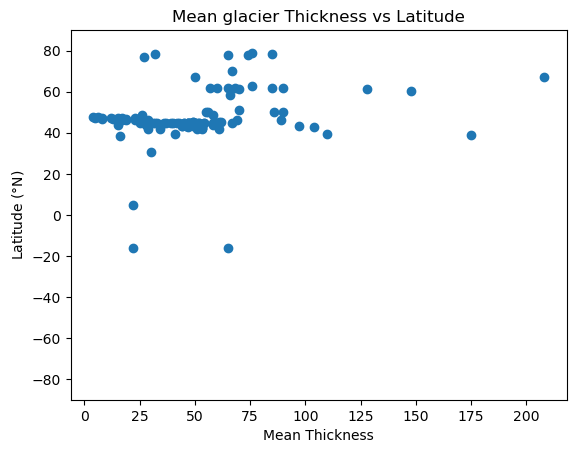

In [65]:
# Figure 1: Mean slope vs mean thickness
# solution
plt.scatter(glacier_df_nonans.mean_thickness, glacier_df_nonans.lat)
plt.ylabel('Latitude ($\degree$N)')
plt.xlabel('Mean Thickness')
plt.title('Mean glacier Thickness vs Latitude')
plt.ylim(-90,90)

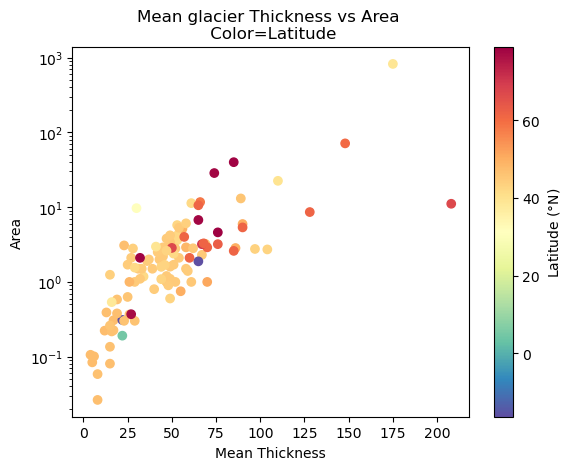

In [54]:
# Figure 2: area vs mean thickness
# solution
plt.scatter(glacier_df_nonans.mean_thickness, glacier_df_nonans.area, 
            c=glacier_df_nonans.lat, cmap='Spectral_r')
plt.ylabel('Area')
plt.xlabel('Mean Thickness')
plt.colorbar(label='Latitude ($\degree$N)')
plt.title('Mean glacier Thickness vs Area \n Color=Latitude')
plt.yscale('log')

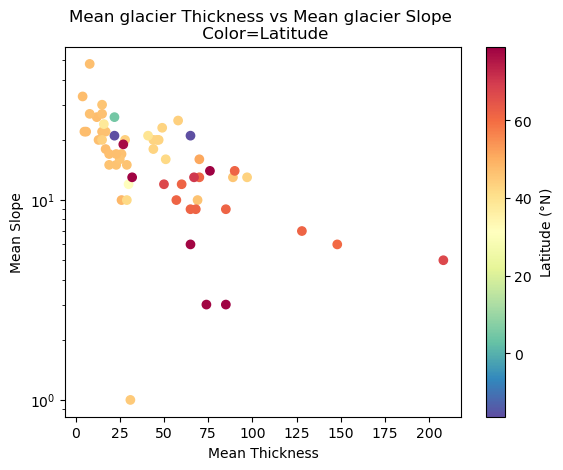

In [62]:
# Figure 3: latitude vs mean thickness
# solution
plt.scatter(glacier_df_nonans.mean_thickness, glacier_df_nonans.mean_slope, 
            c=glacier_df_nonans.lat, cmap='Spectral_r')
plt.ylabel('Mean Slope')
plt.xlabel('Mean Thickness')
plt.colorbar(label='Latitude ($\degree$N)')
plt.title('Mean glacier Thickness vs Mean glacier Slope \n Color=Latitude')
plt.yscale('log')

### b) 3D Scatter plot using Plotly (1 point)

Use the plotly ``scatter_3d`` plot. Make sure to change the pandas series for log scales.

In [78]:
# solution
glacier_df_nonans_logged = glacier_df_nonans.copy()
glacier_df_nonans_logged['area'] = np.log(glacier_df_nonans_logged.area)
glacier_df_nonans_logged['mean_slope'] = np.log(glacier_df_nonans_logged.mean_slope)
px.scatter_3d(data_frame=glacier_df_nonans_logged, 
              x='mean_thickness', y='area', z='mean_slope', color='lat')

/srv/conda/envs/notebook/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning:

divide by zero encountered in log



### c) Pandas Correlation function (1 point)

You may use Pandas functionalities to explore correlation between data. Use the function ``corr`` on the dataframe and the matplotlib function ``matshow`` to plot a heatmap of the correlations

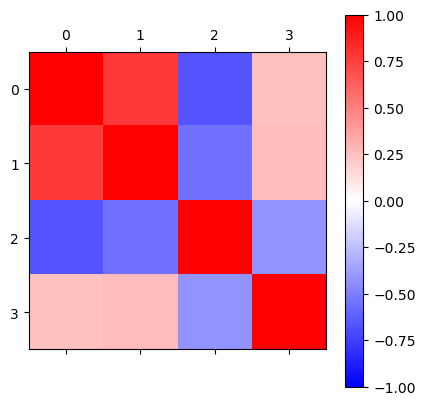

In [97]:
#solution
data_of_interest_df = glacier_df_nonans_logged[['area', 'mean_thickness', 'mean_slope', 'lat']]
plt.matshow(data_of_interest_df.corr(), cmap='bwr', vmin=-1, vmax=1)
plt.colorbar()

### f) Seaborn Plotting (1 point)

Seaborn is a great python package for basic data anlytics. See documentation [here](!https://seaborn.pydata.org/).

<AxesSubplot: >

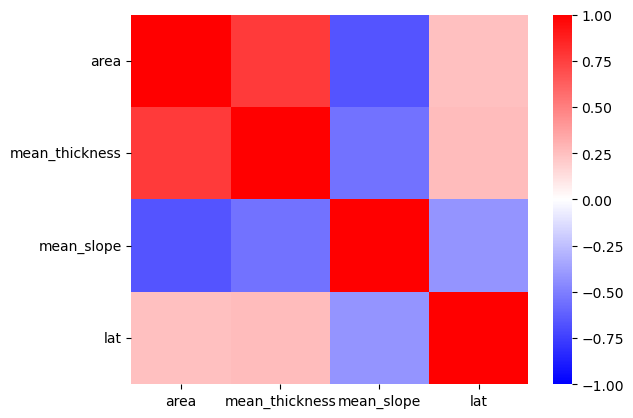

In [98]:
# solution
import seaborn as sns
sns.heatmap(data_of_interest_df.corr(), cmap='bwr', vmin=-1, vmax=1)

Discuss the basic correlations among the data. Do these correction make sense when you think about the shapes of glaciers?

It makes sense that glaciers with larger areas tend to be thicker (i.e., there is a positive correlation between mean thickness and area). I was initially surprised to see such a strong correlation between mean slope and thickness, but after thinking about it the two should be related in some sense. If there is a large slope on the glacier, then that means its thickness probably changes quite a bit too (assuming the surface below the glacier is flat). I also expected to see a stronger correlation between thickness and latitude, but I guess there are very thick tropical glaciers that I am not familiar with. 

The very strong correlation between area and mean_slope was also confusing to me, but after reading the explanation below this makes much more sense.

## 4. Linear Regression (10 points total counted in the next section)
You found from basic data visualization that the three parameters ``mean_slope``, ``mean_thickness``, and ``area`` are correlated. It does make physical sense because a *steep* glaciers is likely to be in the high mountains regions, hanging on the mountain walls, and thus be constrained, and conversely, a flat glacier is either at its valley, ocean terminus or on ice sheets.

### a) Simple linear regression (2 points)
We will now perform a regression between the parameters (or their log!). Linear regressions are models that can be imported from scikit-learn. Log/exp functions in numpy as ``np.log()`` and ``np.exp()``.
Remember that a linear regression is finding $a$ and $b$ knowing both $x$ and the data $y$ in $y = Ax +b$. We want to predict ice thickness from a crude estimate of the glacier area.

__Tips__: 
a. make sure that the dimensions are correct and that there is no NaNs and zeros.
b. Make sure to inport the scikit learn linear regression function and the error metrics.

In [128]:
# solution
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


x = data_of_interest_df.area.to_numpy().reshape(-1, 1)
y = data_of_interest_df.mean_thickness.to_numpy().reshape(-1, 1)
LR_model = LinearRegression()
LR_fit = LR_model.fit(x,y)
a = LR_fit.coef_
b = LR_fit.intercept_
fit = a*x + b

Make a plot of the data and the linear regression your performed

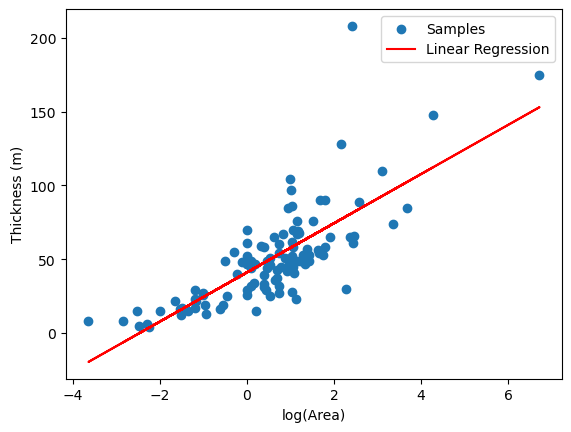

In [136]:
# solution
plt.scatter(data_of_interest_df.area, data_of_interest_df.mean_thickness, label='Samples')
plt.plot(data_of_interest_df.area,fit, color='red', label='Linear Regression')
plt.xlabel('log(Area)')
plt.ylabel('Thickness (m)')
plt.legend()

**Briefly comment on the quality of your fit and a linear regression (1 point)**

As expected from the high correlations we saw between the log(area) and thickness, we see that the linear fit does quite well when we try and predict thickness from the log(area).

The fit looks pretty good, except that there are outliers on the extreme low and high values of mean area.

### b) Leave One Out Cross Validation linear regression (1 point)


Perform the LOCCV on the ``area`` and ``thickness`` values. Predict the ``thickness`` value knowing a ``area`` value. Use material seen in class. Make a plot of your fit.

mean of the regression values is:  16.664333102724527


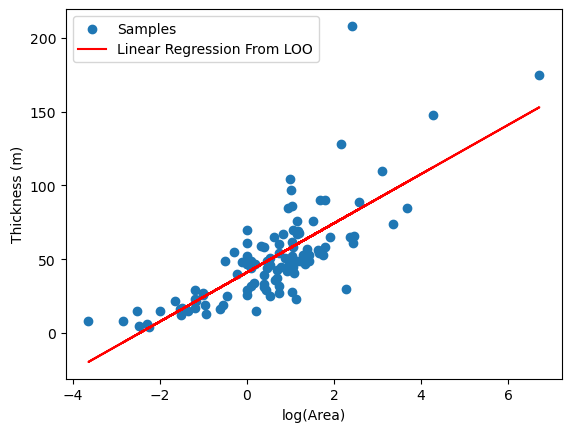

In [177]:
from sklearn.model_selection import LeaveOneOut
# solution
loo = LeaveOneOut()
areas = data_of_interest_df.area.to_numpy().reshape(-1, 1)
thicknesses = data_of_interest_df.mean_thickness.to_numpy().reshape(-1,1)

# initiallize vectors to store values of interest
regression_values = np.zeros(len(areas)) 
intercept_values = np.zeros(len(areas))
i=0
for train_index, test_index in loo.split(areas): 
    areas_train, areas_val = areas[train_index], areas[test_index]
    thicknesses_train, thicknesses_val = thicknesses[train_index], thicknesses[test_index]
    # now fit the data on the training set.
    regr = LinearRegression()
    # Fit on training data:
    regr.fit(areas_train,thicknesses_train)
    # We will first predict the fit:
    thickness_pred_train=regr.predict(areas_train) 
    thickness_pred_val=regr.predict(areas_val) 

    # The coefficients
    regression_values[i]= regr.coef_[0][0]
    intercept_values[i]= regr.intercept_[0]
    i+=1
    
mean_regression_value = np.mean(regression_values)
mean_intercept = np.mean(intercept_values)
# the data shows cleary a trend, so the predictions of the trends are close to each other:
print("mean of the regression values is: ",(np.mean(regression_values)))

plt.scatter(areas, thicknesses, label='Samples')
plt.plot(data_of_interest_df.area.to_numpy(), 
         mean_intercept + data_of_interest_df.area.to_numpy()*mean_regression_value,
         color='red', label='Linear Regression From LOO')
plt.xlabel('log(Area)')
plt.ylabel('Thickness (m)')
plt.legend()

### c) Bootstrapping (1 point)

Perform the same analysis but using a bootstrapping technique. Output the mean and standard deviation of the slope. An illustration with a histogram  may help.

Mean of Bootstrap Coefficients:  16.96511483745222
Std of Coefficients:  1.729149256022353


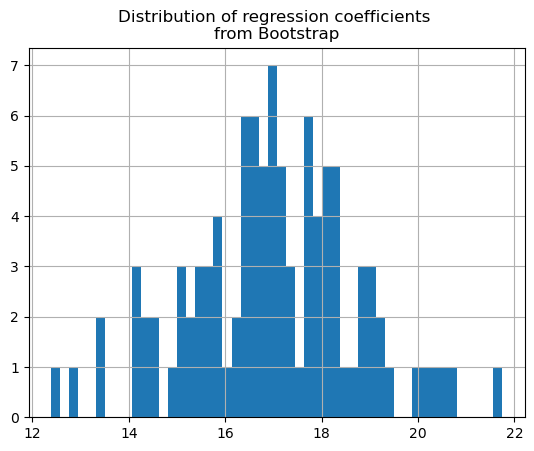

In [171]:
from sklearn.utils import resample
# solution

k=100

bootstrap_regression_coefficients = np.zeros(k) # initalize a vector to store the regression values

i=0
for iik in range(k):    
    ii = resample(np.arange(len(areas)),replace=True,n_samples=len(areas))# new indices
    thicknesses_b, areas_b = thicknesses[ii], areas[ii]
    # now fit the data on the training set.
    regr = LinearRegression()
    # Fit on training data:
    regr.fit(areas_b,thicknesses_b)
    #Epred_val=regr.predict(areas) # test on the validation set.

    # The coefficients
    bootstrap_regression_coefficients[i]= regr.coef_[0][0]
    i+=1

print('Mean of Bootstrap Coefficients: ', np.nanmean(bootstrap_regression_coefficients))
print('Std of Coefficients: ', np.nanstd(bootstrap_regression_coefficients))
plt.hist(bootstrap_regression_coefficients,50);plt.title('Distribution of regression coefficients \nfrom Bootstrap');plt.grid(True)
#plt.show()

### d) Predict the thickness of a glacier (2 points)

Let assume that you measure a glacier of area 10 km$^2$. Can you use your bootstrap regression framework to provide a distribution of possible values of the ice thickness ? Output the mean and standard deviation of the predicted ice thickness.

In [198]:
# solution
k=100
thicknesses_from_bootstrap = np.zeros(k)
i = 0
for iik in range(k):    
    ii = resample(np.arange(len(areas)),replace=True,n_samples=len(areas))# new indices
    thicknesses_b, areas_b = thicknesses[ii], areas[ii]
    # now fit the data on the training set.
    regr = LinearRegression()
    # Fit on training data:
    regr.fit(areas_b,thicknesses_b)
    
    # predict thickness given that area is 10 km^2
    # dont forget that you need to use log(area)
    glacier_thickness_prediction = regr.predict(np.array([[np.log(10)]])) # test the 10 km^2 area glacier.
    
    # The coefficients
    thicknesses_from_bootstrap[i]= glacier_thickness_prediction
    i+=1

Mean Thickness:  79.12855859443108 m
STD Thickness:  4.043818816578202 m


(array([ 1.,  7., 16., 21., 25., 21.,  7.,  0.,  1.,  1.]),
 array([68.6249943 , 71.16771569, 73.71043707, 76.25315845, 78.79587983,
        81.33860122, 83.8813226 , 86.42404398, 88.96676537, 91.50948675,
        94.05220813]),
 <BarContainer object of 10 artists>)

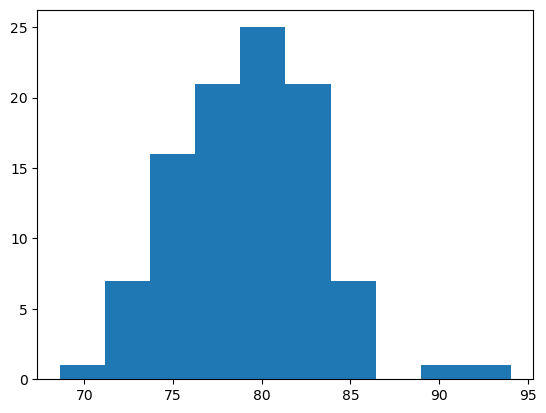

In [199]:
print('Mean Thickness: ', np.nanmean(thicknesses_from_bootstrap), 'm') 
print('STD Thickness: ', np.nanstd(thicknesses_from_bootstrap), 'm') 

plt.hist(thicknesses_from_bootstrap)

In [194]:
np.log(10)

2.302585092994046